# Test del paquete algo_optim_mod04

<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/ccm-2023/src/notebooks/python/test_paquete_algo_optim_mod04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Probaremos nuestro paquete con la función Himmelblau

$$
f(x,y) = (x^2 + y -11)^2 + (x + y^2 -7)^2
$$

* Mínimos locales:
$$
\begin{align}
	\min \begin{cases} 
      f(3.0,2.0) &= 0 \\
      f(-2.805118,3.131312) &=0 \\
      f(-3.779310,-3.283186) &=0\\
	  f(3.584428,-1.848126)&=0
   \end{cases}
\end{align}
$$

* Espacio de búsqueda:

$$
-5 \leq x,y \leq 5
$$

* Gradiente:

$$
\nabla f(x,y)=  \begin{bmatrix}
\frac{\partial f(x,y)}{\partial x} \\
\frac{\partial f(x,y)}{\partial y}
\end{bmatrix} =
 \begin{bmatrix}
4x (x^2 + y - 11) + 2(x + y^2 - 7) \\
2(x^2 + y - 11) + 4  y  (x + y^2 - 7)
\end{bmatrix} 
$$

/tmp/ipykernel_1391252/1519135230.py:22: UserWarning: Log scale: values of z <= 0 have been masked
  cp = ax.contourf(X, Y, Z, locator=ticker.LogLocator(base = 2), cmap=cm.PuBu_r)


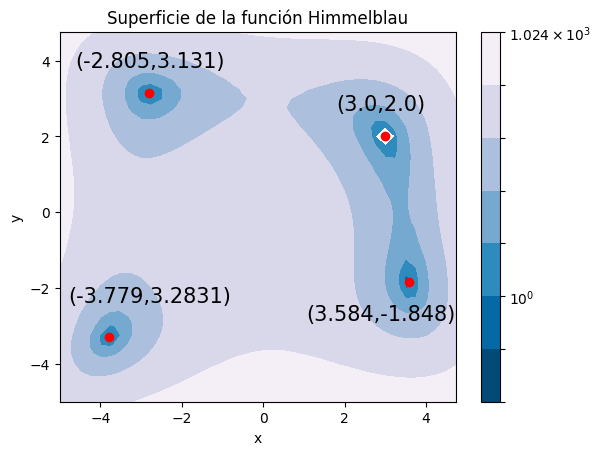

In [1]:
# Graficamos la gráfica de contorno de la función de la Himmelblau

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import ticker, cm


# Función a minimizar
def f_himmelblau(X):
  x,y = X
  return (x**2 + y -11)**2 + (x + y**2 -7)**2

# Generamos valores para Y y X.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2 + Y -11)**2 + (X + Y**2 -7)**2


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z, locator=ticker.LogLocator(base = 2), cmap=cm.PuBu_r)
fig.colorbar(cp)
### Agregamos lo mínimos
plt.plot(3.0,2.0,color='red',marker='o')
plt.plot(-2.805118,3.131312,color='red',marker='o')
plt.plot(-3.779310,-3.283186,color='red',marker='o')
plt.plot(3.584428,-1.848126,color='red',marker='o')

ax.annotate('(3.0,2.0)', xy =(1.8,2.7),fontsize=15)
ax.annotate('(-2.805,3.131)', xy =(-4.605118,3.831312),fontsize=15)
ax.annotate('(-3.779,3.2831)', xy =(-4.779310,-2.383186),fontsize=15)
ax.annotate('(3.584,-1.848)', xy =(1.0584428,-2.848126),fontsize=15)
  
    
ax.set_title('Superficie de la función Himmelblau')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()



In [2]:
# Instalamos el paquete algo_optim_mod04
!pip install git+https://github.com/milocortes/algo_optim_mod04.git@main

  Cloning https://github.com/milocortes/algo_optim_mod04.git (to revision main) to /tmp/pip-req-build-_e2vethi
  Running command git clone --filter=blob:none --quiet https://github.com/milocortes/algo_optim_mod04.git /tmp/pip-req-build-_e2vethi
  Resolved https://github.com/milocortes/algo_optim_mod04.git to commit f1bca992162a6dd5b39dc546940efa1bc5cf8ef0
  Preparing metadata (setup.py) ... done
  Created wheel for algo-optim-mod04: filename=algo_optim_mod04-0.0.1-py3-none-any.whl size=14515 sha256=2b1e95dc6026442fb3767eefd845d3d00e62d93efb6cb901ce461c7b133d0810
  Stored in directory: /tmp/pip-ephem-wheel-cache-9uvrvhoz/wheels/f9/00/58/6c4ca48969c90af838c490722e8e5fb7f209a8c23effec663b
Successfully built algo-optim-mod04


In [3]:
def gradiente_himmelblau(x, y):
    dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([dx,dy])

In [4]:
import numpy as np

# Tasa de aprendizaje
rho = 0.002

# Número de iteraciones
maxiter = 100

# Punto inicial
x_init = np.array([-4, 4])

# Cargamos nuestro paquete 
from algo_optim_mod04.algoritmos_primer_orden import steepest_descent

steepest_descent(gradiente_himmelblau, x_init, rho, maxiter)

Iteración 0
Iteración 10
Iteración 20
Iteración 30
Iteración 40
Iteración 50
Iteración 60
Iteración 70
Iteración 80
Iteración 90


array([-2.80511873,  3.13131258])